In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

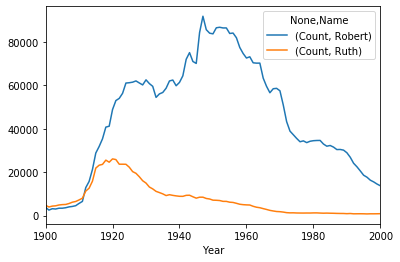

In [13]:
# Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(f'names/yob{year}.txt', names=['Name','Gender','Count'])
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
plot = name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()
plot


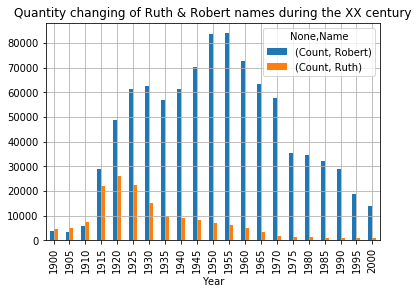

In [20]:
# Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(f'names/yob{year}.txt', names=['Name','Gender','Count'])
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar(
    title="Quantity changing of Ruth & Robert names during the XX century", grid=True)

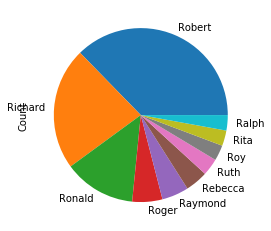

In [39]:
# Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
names = pd.read_csv(
    'names/yob1950.txt',
    names=['Name', 'Gender', 'Count'])
names_barh = names[names['Name'].str[0] == 'R'].sort_values('Count', ascending=False).head(10)
names_for_pie = names_barh.groupby('Name').sum().sort_values(by='Count', ascending=False)
plot_pie = names_for_pie.plot.pie(y='Count', legend=False)

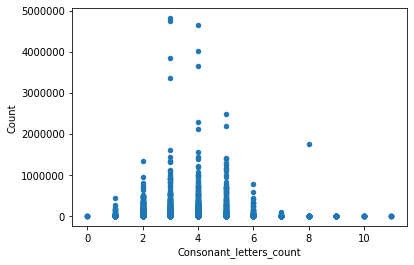

In [56]:
# Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет.
# Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, 
# посчитать количество согласных букв в каждом имени и вывести на график отношение
# "Количество согласных букв в имени" : "Количество употреблений".

names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(f'names/yob{year}.txt', names=['Name','Gender','Count'])    

names = pd.concat(names_by_year).reset_index(level=1, drop=True)
consonant = 'BCDFGHJKLMNPQRSTVXZWYbcdfghjklmnpqrstvxzwy'

letters_in_name = names.groupby(['Name']).sum()
letters_in_name['Consonant_letters_count'] = sum(letters_in_name.index.str.count(letter) for letter in consonant)
letters_in_name.plot(kind='scatter', x='Consonant_letters_count', y='Count')